In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [41]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Предметная область, источник данных и характер данных

Датасет относится к области маркетинга, создан для анализа поведения клиентов.  

Источник данных: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Характер данных: данные являются реальными, собранными с клиентов розничной компании.

## Описание атрибутов и их типы

Датасет содержит 29 исходных признаков.
## Люди

- **ID** - уникальный идентификатор клиента  
- **Year_Birth** - год рождения клиента  
- **Education** - уровень образования  
- **Marital_Status** - семейное положение  
- **Income** - годовой доход клиента  
- **Kidhome** - количество детей в доме  
- **Teenhome** - количество подростков в доме  
- **Dt_Customer** - дата регистрации клиента в компании  
- **Recency** - количество дней с момента последней покупки  
- **Complain** - 1, если клиент жаловался в течение последних 2 лет, иначе 0  

## Продукты

- **MntWines** - сумма, потраченная на вино  
- **MntFruits** - сумма, потраченная на фрукты  
- **MntMeatProducts** - сумма, потраченная на мясные продукты  
- **MntFishProducts** - сумма, потраченная на рыбу  
- **MntSweetProducts** - сумма, потраченная на сладости  
- **MntGoldProds** - сумма, потраченная на товары премиум-класса (подарки/золото)  

## Продвижение

- **NumDealsPurchases** - количество покупок, совершённых со скидкой  
- **AcceptedCmp1** - 1, если клиент принял предложение в 1-й кампании  
- **AcceptedCmp2** - 1, если клиент принял предложение во 2-й кампании  
- **AcceptedCmp3** - 1, если клиент принял предложение в 3-й кампании  
- **AcceptedCmp4** - 1, если клиент принял предложение в 4-й кампании  
- **AcceptedCmp5** - 1, если клиент принял предложение в 5-й кампании  
- **Response** - 1, если клиент принял предложение в последней кампании  

## Место (каналы покупки)

- **NumWebPurchases** - количество покупок, сделанных через веб-сайт компании  
- **NumCatalogPurchases** - количество покупок, сделанных по каталогу  
- **NumStorePurchases** - количество покупок, совершённых в физических магазинах  
- **NumWebVisitsMonth** - количество посещений веб-сайта компании за последний месяц  

### Прочие признаки

- **Z_CostContact** - стоимость контакта (константа = 3)
- **Z_Revenue** - доход (константа = 11)

### Описание задачи анализа

Датасет предназначен для решения задач сегментации клиентов методом кластеризации, выделения целевых групп для маркетинга, оценки реакции на рекламные кампании. 

Основная цель анализа - выявить группы клиентов с похожими характеристиками и поведением, чтобы улучшить эффективность маркетинговых кампаний и персонализировать предложения.

# 1. Добавление нового атрибута Age
Так как датасет содержит дату регистрации клиента (Dt_Customer), а информация о дате последнего заказа отсутствует, будем считать возраст клиента на момент его регистрации.

Поэтому новый атрибут Age вычисляется как:

Age = max(Dt_Customer.year) – Year_Birth.

In [42]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
print(df['Dt_Customer'].max())

2014-06-29 00:00:00


In [43]:
df["Age"] = 2014 - df["Year_Birth"]
print(df[["Year_Birth", "Age"]].head())

   Year_Birth  Age
0        1957   57
1        1954   60
2        1965   49
3        1984   30
4        1981   33


In [44]:
df.to_csv("marketing_campaign_with_age.csv", sep="\t", index=False)
df_new = pd.read_csv("marketing_campaign_with_age.csv", sep="\t")
df_new.head(5)
df_new.shape

(2240, 30)

# 2. Очистка датасета 

Удалим выбросы и дубли, обработаем пропущенные значения.

In [45]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64


В столбце Income (доход клиента) 24 пропущенных значения. Для заполнения пропусков используем медиану.

In [46]:
df_new.fillna({"Income": df_new["Income"].median()}, inplace=True)

In [47]:
numeric_cols = df_new.select_dtypes(include="number").columns
print(df_new[numeric_cols].describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

Удалим клиентов с некорректным возрастом (младше 18 и старше 100 лет), неинформативные или константные признаки (Z_CostContact, Z_Revenue) и идентификатор клиента (ID), не участвующий в анализе. 

In [48]:
df_new = df_new[(df_new["Age"] >= 18) & (df_new["Age"] <= 100)]
df_new.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)
df_new.drop(["ID"], axis=1, inplace=True)

In [49]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
cols_for_iqr = [
    "Income", "Age", "NumWebVisitsMonth", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"
    #"MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "MntWines"
]

for col in cols_for_iqr:
    df_new = remove_outliers_iqr(df_new, col)
df_new.shape

(2118, 27)

Не исключаем выбросы по признакам трат (MntWines, MntFruits и др.), потому что высокие значения этих переменных отражают реальных "премиальных" клиентов, а не ошибки. Удаление выбросов по этим атрибутам приводит к сильному сокращению выборки (менее 1000 строк из 2240) и потере важной информации.

Добавим новый атрибут TotalSpent, который представляет собой сумму всех трат клиента за последние два года по различным категориям товаров. Этот признак позволяет получить обобщённую оценку покупательской активности клиента. И построим корреляционную матрицу для всех числовых признаков, чтобы оценить взаимосвязи между переменными.

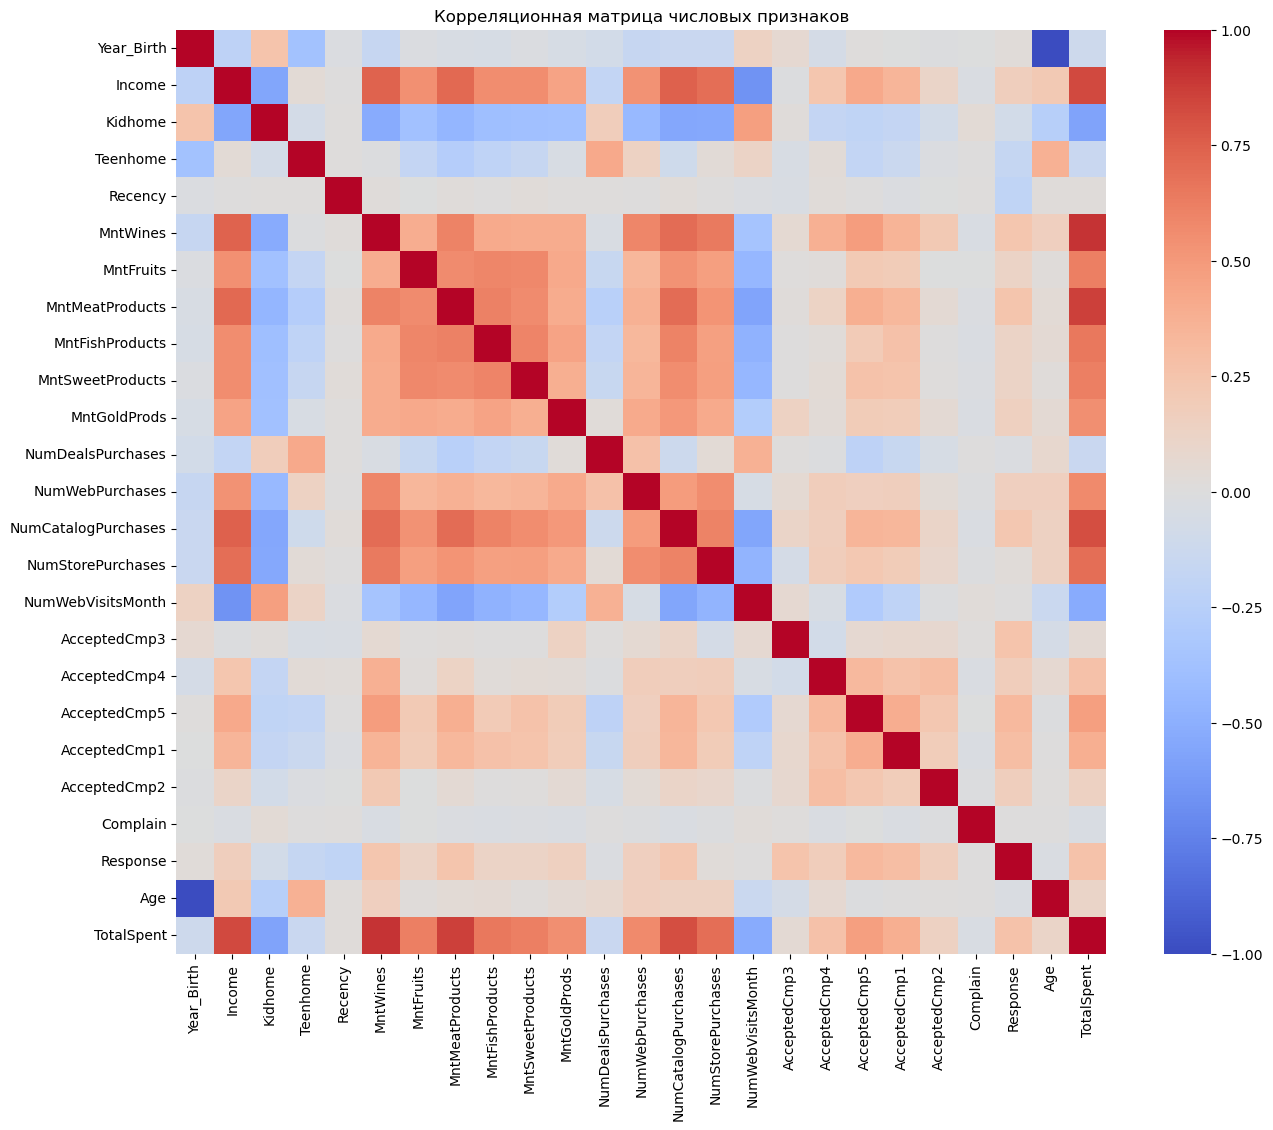

In [50]:
df_new["TotalSpent"] = (
    df_new["MntWines"] +
    df_new["MntFruits"] +
    df_new["MntMeatProducts"] +
    df_new["MntFishProducts"] +
    df_new["MntSweetProducts"] +
    df_new["MntGoldProds"]
)
numeric_df = df_new.select_dtypes(include="number")

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Корреляционная матрица числовых признаков")
plt.show()

# 3. Построение графиков зависимости и описание кластеров (групп)

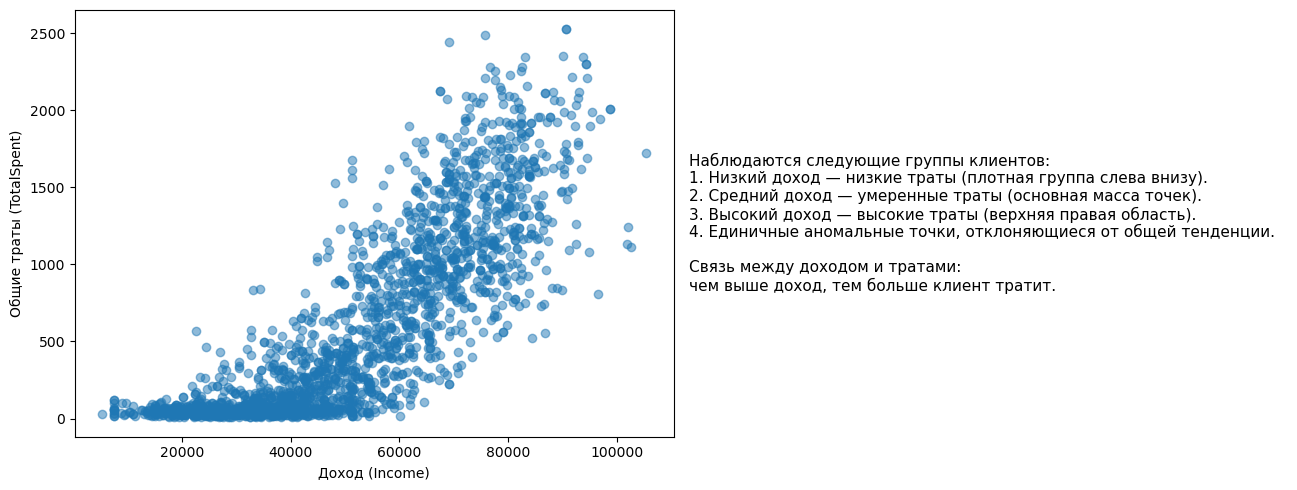

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df_new["Income"], df_new["TotalSpent"], alpha=0.5)
axes[0].set_xlabel("Доход (Income)")
axes[0].set_ylabel("Общие траты (TotalSpent)")

text = (
    "Наблюдаются следующие группы клиентов:\n"
    "1. Низкий доход - низкие траты (плотная группа слева внизу).\n"
    "2. Средний доход - умеренные траты (основная масса точек).\n"
    "3. Высокий доход - высокие траты (верхняя правая область).\n"
    "4. Единичные аномальные точки, отклоняющиеся от общей тенденции.\n\n"
    "Связь между доходом и тратами: \n"
    "чем выше доход, тем больше клиент тратит."
)
axes[1].axis("off") 
axes[1].text(0, 0.5, text, fontsize=11, va="center")

plt.tight_layout()
plt.show()

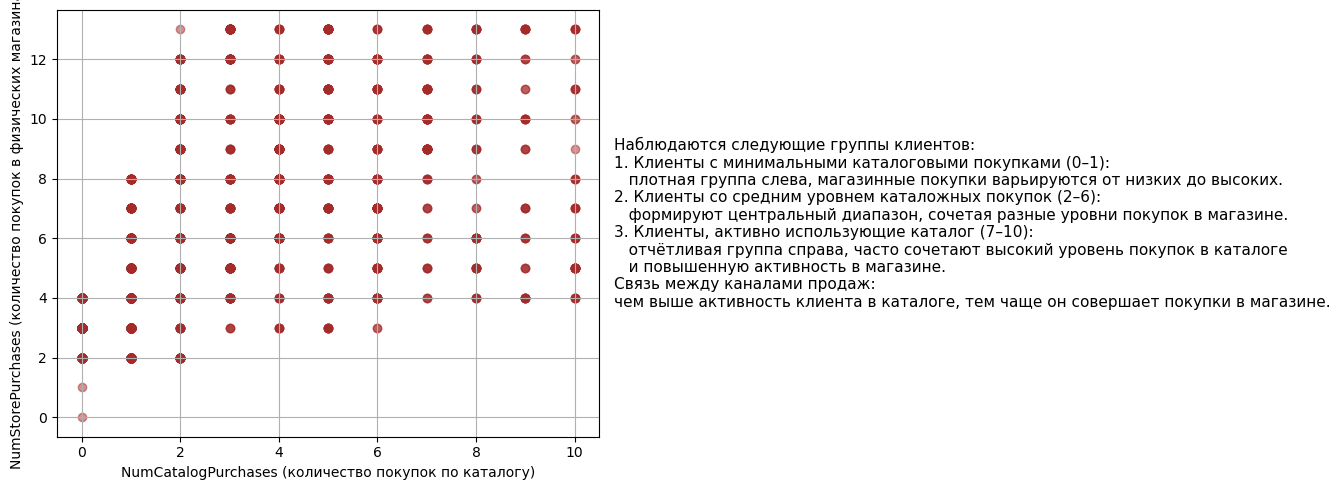

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(df_new["NumCatalogPurchases"], df_new["NumStorePurchases"], alpha=0.5, color="brown")
axes[0].set_xlabel("NumCatalogPurchases (количество покупок по каталогу)")
axes[0].set_ylabel("NumStorePurchases (количество покупок в физических магазинах)")
axes[0].grid(True)

text = (
    "Наблюдаются следующие группы клиентов:\n"
    "1. Клиенты с минимальными каталоговыми покупками (0–1):\n"
    "   плотная группа слева, магазинные покупки варьируются от низких до высоких.\n"
    "2. Клиенты со средним уровнем каталожных покупок (2–6):\n"
    "   формируют центральный диапазон, сочетая разные уровни покупок в магазине.\n"
    "3. Клиенты, активно использующие каталог (7–10):\n"
    "   отчётливая группа справа, часто сочетают высокий уровень покупок в каталоге\n"
    "   и повышенную активность в магазине.\n"
    "Связь между каналами продаж:\n"
    "чем выше активность клиента в каталоге, тем чаще он совершает покупки в магазине."
)

axes[1].axis("off")
axes[1].text(0, 0.5, text, fontsize=11, va="center")

plt.tight_layout()
plt.show()

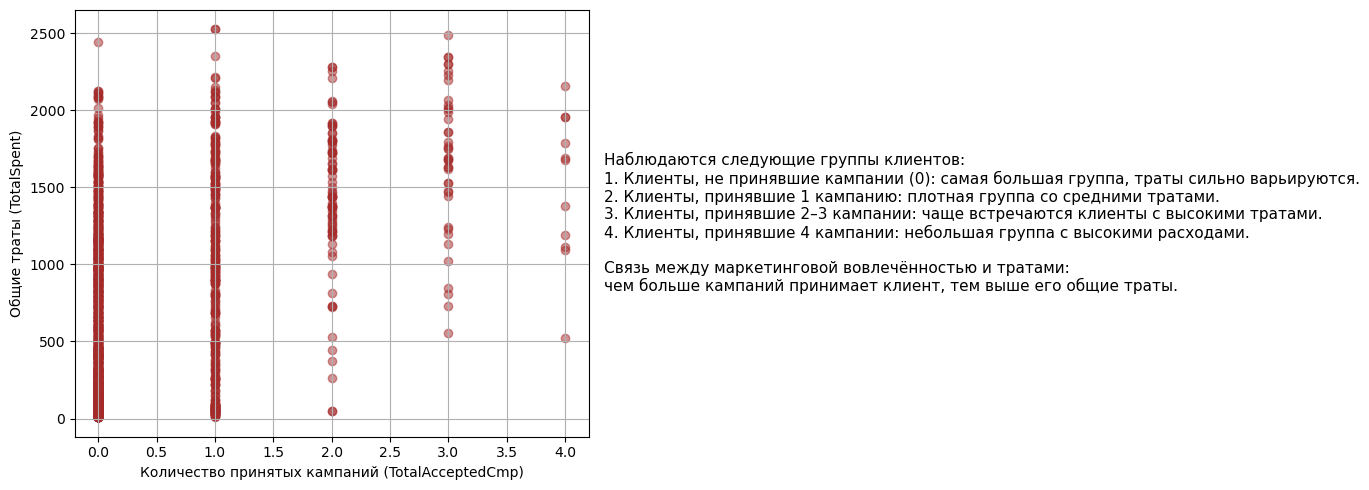

In [53]:
df_new["TotalAcceptedCmp"] = (
    df_new["AcceptedCmp1"] +
    df_new["AcceptedCmp2"] +
    df_new["AcceptedCmp3"] +
    df_new["AcceptedCmp4"] +
    df_new["AcceptedCmp5"]
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(df_new["TotalAcceptedCmp"], df_new["TotalSpent"], alpha=0.5, color="brown")
axes[0].set_xlabel("Количество принятых кампаний (TotalAcceptedCmp)")
axes[0].set_ylabel("Общие траты (TotalSpent)")
axes[0].grid(True)

text = (
    "Наблюдаются следующие группы клиентов:\n"
    "1. Клиенты, не принявшие кампании (0): самая большая группа, траты сильно варьируются.\n"
    "2. Клиенты, принявшие 1 кампанию: плотная группа со средними тратами.\n"
    "3. Клиенты, принявшие 2–3 кампании: чаще встречаются клиенты с высокими тратами.\n"
    "4. Клиенты, принявшие 4 кампании: небольшая группа с высокими расходами.\n\n"
    "Связь между маркетинговой вовлечённостью и тратами:\n"
    "чем больше кампаний принимает клиент, тем выше его общие траты."
)

axes[1].axis("off")
axes[1].text(0, 0.5, text, fontsize=11, va="center")

plt.tight_layout()
plt.show()

# 4. Метод KMeans

In [54]:
data = df_new.copy()

features = [
    "Income",
    "Age",
    "Recency",
    "TotalSpent",
    "NumWebVisitsMonth",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "TotalAcceptedCmp"
]

X = data[features]
X.head()

,Income,Age,Recency,TotalSpent,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,TotalAcceptedCmp
0,58138.0,57,58,1617,7,8,10,0
1,46344.0,60,38,27,5,1,1,0
2,71613.0,49,26,776,4,8,2,0
3,26646.0,30,26,53,6,2,0,0
4,58293.0,33,94,422,5,5,3,0


In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Форма X_scaled:", X_scaled.shape)

Форма X_scaled: (2118, 8)


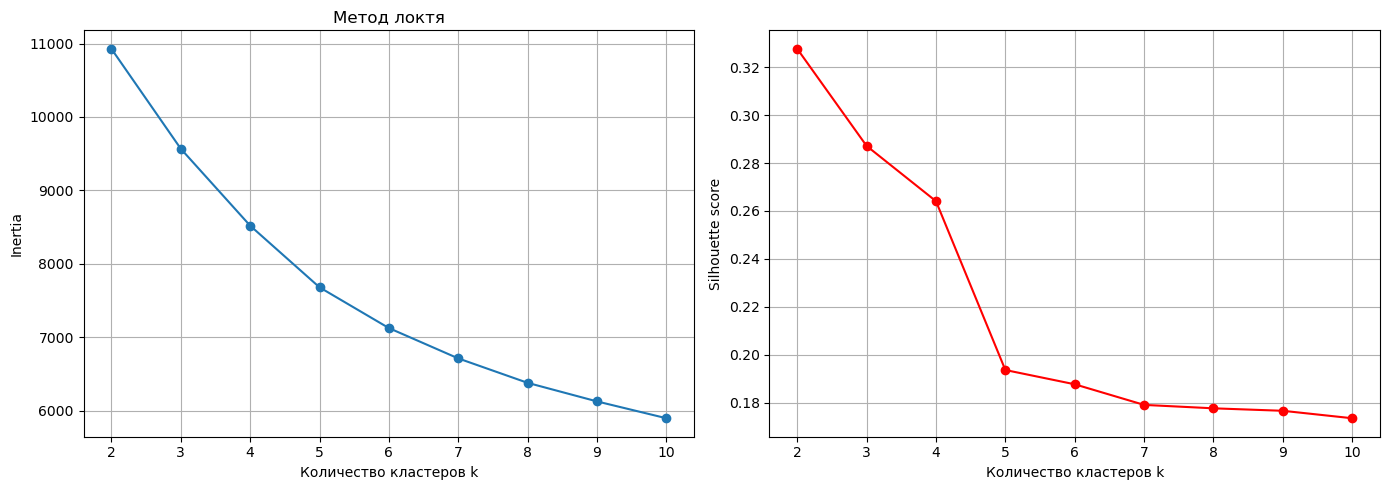

In [57]:
inertia = []
sil_scores = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker="o")
plt.title("Метод локтя")
plt.xlabel("Количество кластеров k")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker="o", color="red")
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [59]:
k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters
df_new["Cluster"] = clusters 

print("Распределение объектов по кластерам:")
print(data["Cluster"].value_counts())

Распределение объектов по кластерам:
Cluster
0    1057
1     476
2     461
3     124
Name: count, dtype: int64


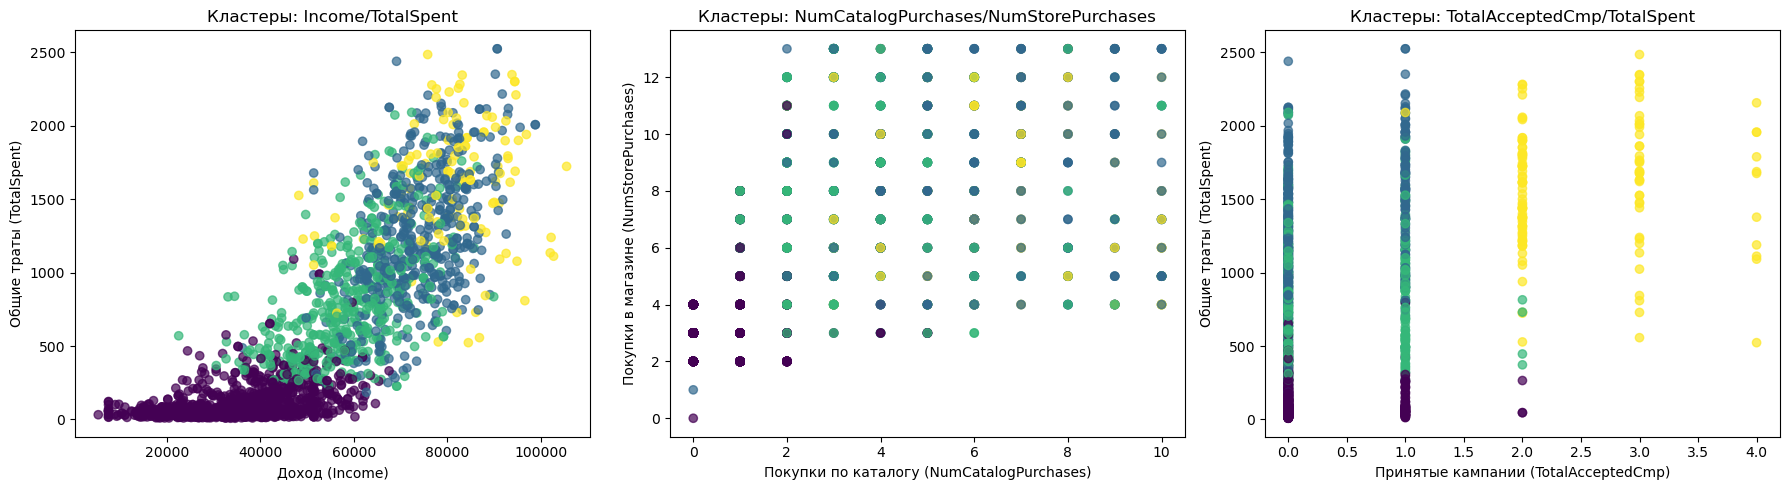

In [62]:
plt.figure(figsize=(18, 5))

# 1. Income/TotalSpent
plt.subplot(1, 3, 1)
plt.scatter(data["Income"], data["TotalSpent"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Доход (Income)")
plt.ylabel("Общие траты (TotalSpent)")
plt.title("Кластеры: Income/TotalSpent")

# 2. NumCatalogPurchases/NumStorePurchases
plt.subplot(1, 3, 2)
plt.scatter(data["NumCatalogPurchases"], data["NumStorePurchases"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Покупки по каталогу (NumCatalogPurchases)")
plt.ylabel("Покупки в магазине (NumStorePurchases)")
plt.title("Кластеры: NumCatalogPurchases/NumStorePurchases")

# 3. TotalAcceptedCmp/TotalSpent
plt.subplot(1, 3, 3)
plt.scatter(data["TotalAcceptedCmp"], data["TotalSpent"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Принятые кампании (TotalAcceptedCmp)")
plt.ylabel("Общие траты (TotalSpent)")
plt.title("Кластеры: TotalAcceptedCmp/TotalSpent")

plt.tight_layout()
plt.show()

In [84]:
cluster_profile = data.groupby("Cluster")[features].mean().round(2)
cluster_profile

,Income,Age,Recency,TotalSpent,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,TotalAcceptedCmp
Cluster,,,,,,,,
0,35109.02,42.51,49.00,109.49,6.33,2.15,0.59,0.08
1,73258.98,46.72,50.91,1221.36,2.43,4.53,5.50,0.24
2,58814.15,49.25,47.39,803.02,6.19,7.22,3.11,0.26
3,80346.81,43.42,49.64,1584.31,3.58,5.50,5.94,2.50


# Выводы
Подготовка данных

На основе исходного датасета был сформирован очищенный набор данных для проведения кластерного анализа.
Были выполнены следующие шаги:

- удалены записи с некорректным возрастом (младше 18 и старше 100 лет);

- удалены неинформативные или константные признаки (Z_CostContact, Z_Revenue);

- исключён идентификатор клиента (ID), не влияющий на кластеризацию;

- заполнены пропуски в доходах медианой;

- удалены выбросы по ключевым числовым признакам (Income, Age, NumWebVisitsMonth, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases);

- добавлен новый атрибут TotalSpent, характеризующий сумму всех покупок клиента за период наблюдения.

## Визуальный анализ

Для выбора атрибутов кластеризации и понимания структуры данных были построены несколько графиков рассеяния:

График “Income/TotalSpent”
Позволил выделить клиентские группы по уровню дохода и общей сумме трат.
Хорошо различимы уровни платёжеспособности: низкий, средний, выше среднего и высокий.

График “NumCatalogPurchases/NumStorePurchases”
Показал различия между клиентами по предпочтительным каналам покупок
(каталог, магазины или равномерная активность).

График “TotalAcceptedCmp/TotalSpent”
Показал зависимость отклика на маркетинговые кампании от общей суммы покупок.
Чётко видны группы: от полностью не вовлечённых клиентов до наиболее активных.

## Метод KMeans

Для определения оптимального количества кластеров были применены:

метод локтя (Inertia) - показал заметное замедление снижения ошибки при k=4;

silhouette score - также подтвердил допустимую отделимость кластеров при k=4.

В результате для модели был выбран параметр k = 4.

### Интерпретация полученных кластеров
Кластер 0 - низкий доход, низкие траты

минимальная покупательская активность;

редко совершают онлайн-покупки и почти не участвуют в маркетинговых кампаниях;

экономное поведение, низкая вовлечённость.

Кластер 1 - клиенты со средним доходом и умеренными тратами

активно посещают сайт и совершают небольшие онлайн-покупки;

средняя реакция на маркетинговые кампании;

сбалансированная покупательская активность.

Кластер 2 - клиенты выше среднего уровня

совершают больше покупок как онлайн, так и офлайн;

часто покупают через каталоги;

демонстрируют большее разнообразие покупательского поведения.

Кластер 3 - наиболее ценные клиенты (VIP-сегмент)

высокий доход и очень высокие траты (TotalSpent);

активно участвуют в рекламных кампаниях (часто принимают предложения 3–4 кампаний);

много покупают в магазинах и по каталогам;

стратегически важная группа для компании.

### Общий итог

Проведённая кластеризация позволила выделить четыре сегмента клиентов, которые различаются по уровню дохода, общей сумме трат, активности покупок и отклику на маркетинговые кампании. Эти сегменты могут быть использованы для персонализированного маркетинга, оптимизации кампаний и повышения эффективности коммуникаций с клиентами.